In [1]:
# importing required libraries
import pandas as pd

In [2]:
# reading csv file
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# groping of columns by categorical columns based 
df.groupby(["region","smoker","sex"]).agg(["min","max"])[["charges","age"]]

charges              age    
                                 min          max min max
region    smoker sex                                     
northeast no     female   2196.47320  31620.00106  18  64
                 male     1694.79640  32108.66282  18  64
          yes    female  14283.45940  58571.07448  18  63
                 male    12829.45510  48549.17835  18  62
northwest no     female   2117.33885  33471.97189  19  64
                 male     1621.34020  30284.64294  19  64
          yes    female  14711.74380  55135.40209  19  64
                 male    15817.98570  60021.39897  19  62
southeast no     female   1607.51010  36580.28216  18  64
                 male     1121.87390  27724.28875  18  64
          yes    female  16577.77950  63770.42801  18  64
                 male    17043.34140  62592.87309  18  64
southwest no     female   1727.78500  36910.60803  19  64
                 male     1241.56500  27941.28758  19  64
          yes    female  13844.50600  48824.45000  19  64
                 male    15820.69900  52590.82939  19  61

# Insights
1. In all regions patients min age is 19 and max age is 64
2. The all region patients have habit of smoke in male and female
3. And female and male patients from all regions

In [3]:
# shape of the data frame
df.shape

(1338, 7)

In [4]:
# columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
# columns datatype
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# checking null /missing values detecttion
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# non -visual univariate analysis
## min ,max ,mean,median,std



In [4]:
import matplotlib.pyplot as plt
from scipy import stats               

In [25]:
# statistical measures 
# no outliers in age
print(df["age"].min())
print(df["age"].max())
print(df["age"].mean())
print(df["age"].median())
print(df["age"].std())

18
64
39.20702541106129
39.0
14.049960379216172


# visual univariate analysis

## Analysing of age

NameError: name 'plt' is not defined

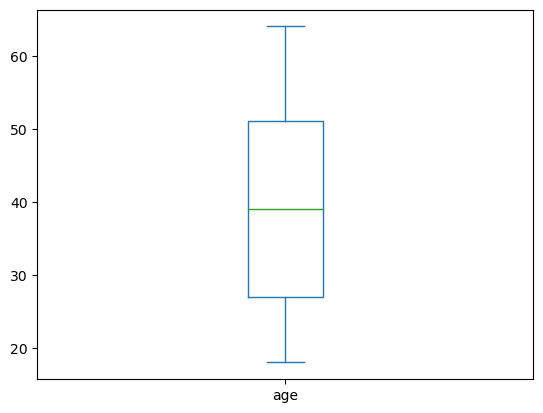

In [4]:
# the boxplot shows the outliers
df["age"].plot(kind="box")
plt.title("box plot of age ")
plt.show()

# Insights
1. The boxplot of age column there are no outliers in the data
2. The age column average age is 39

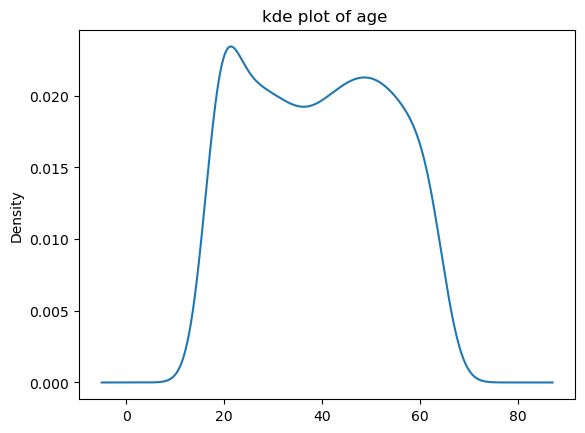

In [16]:
# this is kde plot 
df["age"].plot(kind="kde")
plt.title("kde plot of age ")
plt.show()

In [14]:
df["age"].skew()


0.05567251565299186

# Insights
1. The kde plot looks symmetric but it's not normal distribution
2. the skewness of age 0.05567251565299186


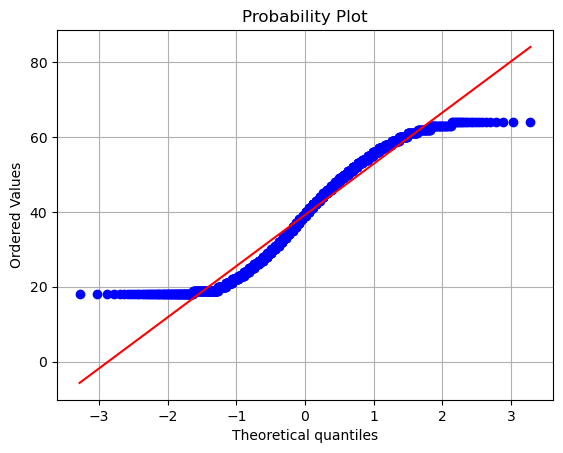

In [18]:
# this qq plot checking the distribution is normal or uniform
stats.probplot(df["age"],dist="norm",plot=plt)
plt.grid()

# Insights
1. In the qq plot of age column  it is not a normal distribution
2. The dots are not pointed on the  45 degree line

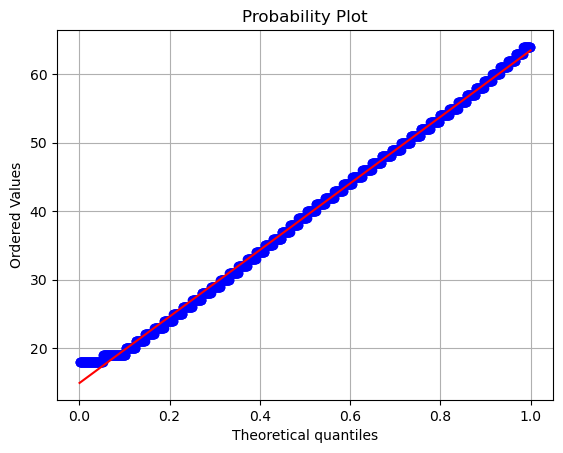

In [19]:
# this qq plot checking the distribution is normal or uniform
stats.probplot(df["age"],dist="uniform",plot=plt)
plt.grid()

# Insights
1. The age column is uniform distribution
2. The all dots are pointed on 45 degree line

## analysing of sex

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
df["sex"].mode()

0    male
Name: sex, dtype: object

In [22]:
# count of values
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [23]:
# normalize mean shows the probability
df["sex"].value_counts(normalize=True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

<AxesSubplot:>

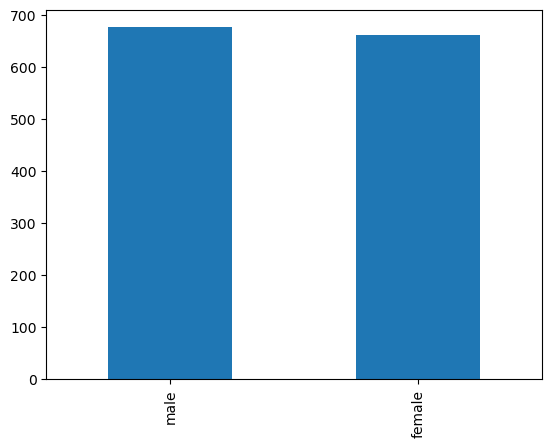

In [24]:
# bar plot of categorical column
df["sex"].value_counts().plot(kind="bar")

# Insights 
1. The sex column has two unique values
2. The male value count is 676
3. The female value count is 662
4. There are males are more than female

## analysing of BMI

In [27]:
# non visual univariate analysis
print(df["bmi"].min())
print(df["bmi"].max())
print(df["bmi"].mean())
print(df["bmi"].median())
print(df["bmi"].std())
print(" the mean and median both are very near may be there is no outliers")

15.96
53.13
30.663396860986538
30.4
6.098186911679017
 the mean and median both are very near may be there is no outliers


<AxesSubplot:>

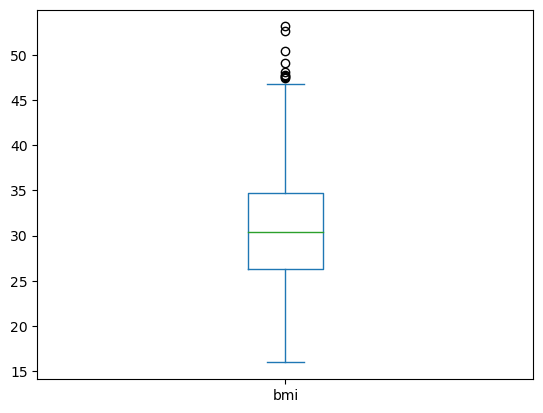

In [28]:
# visual univariate analysis
# box plot to find outliers
df["bmi"].plot(kind="box")

# Insights
1. There are outliers in the data where bmi > 45

In [12]:
def outliers(df,col):

    q1=np.quantile(df[col],0.25)
    q2=np.quantile(df[col],0.50)
    q3=np.quantile(df[col],0.75)
    # calculation iqr
    IQR =q3-q1
    lower_boundary=q1-(1.5*IQR)
    upper_boundary=q3+(1.5*IQR)
    df=df[(df[col]>lower_boundary)&(df[col]<upper_boundary)]
    return df


<AxesSubplot:ylabel='Density'>

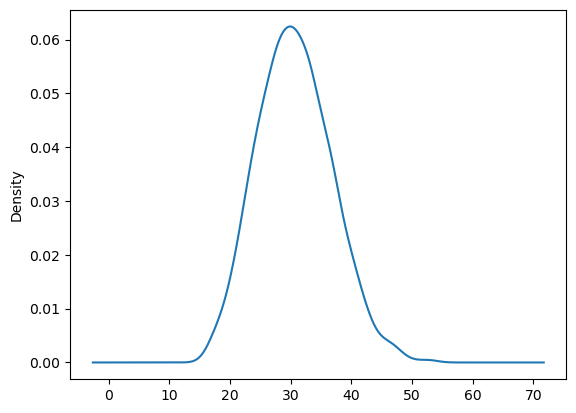

In [29]:
# The kde plot when outliers are presented on data
df["bmi"].plot(kind="kde")

In [13]:
df["bmi"].skew()

0.2840471105987448

# Insights
1. The kde plot looks symmetric and bell shaped 
2. The plot is positive skew
3. The skew indicates the outliers
4. The  bmi  data before treating outliers the skewness 0.2840471105987448
 

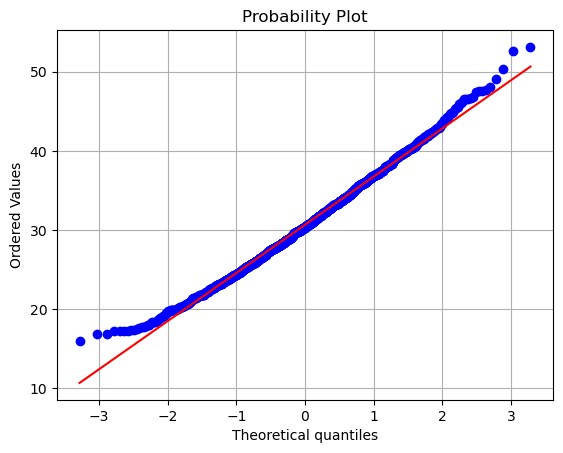

In [35]:
# qq plot of bmi
stats.probplot(df["bmi"],dist="norm",plot=plt)
plt.grid()

# Insights
1. The plot is similar to normal distribution
2. The top and bottom few dots are not on line those are outliers 

In [5]:
# treating or sipping of outliers from the data
clen_df=df[(df["bmi"]<=47)]
print(df.shape)
print(clen_df.shape)

(1338, 7)
(1329, 7)


In [93]:
df.shape

(1338, 7)

In [15]:
df=outliers(df,"bmi")
print(df.shape)

(1329, 7)


In [14]:
import numpy as np

<AxesSubplot:>

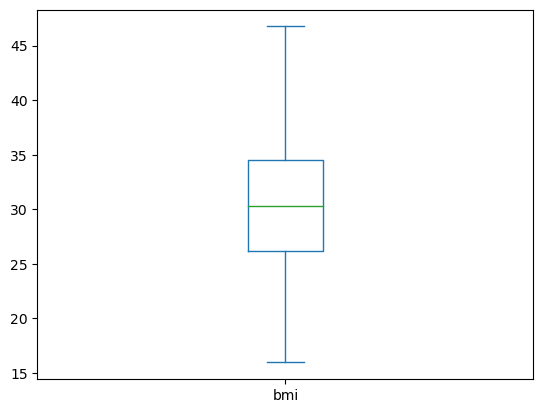

In [5]:
# box plot with  out outliers
df["bmi"].plot(kind="box")

# Insights
1. This plot with outliers
2. The avreage bmi is at 30

<AxesSubplot:ylabel='Density'>

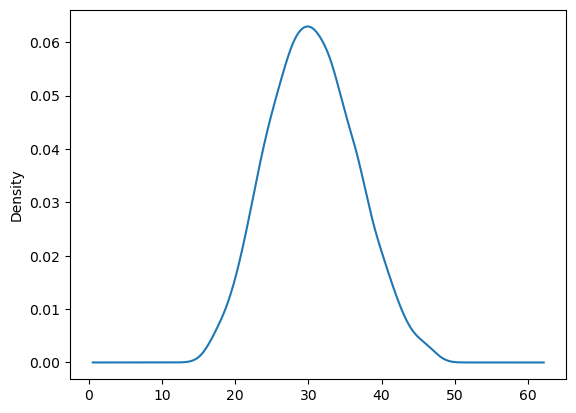

In [59]:
# kde plot with out outliers
clen_df["bmi"].plot(kind="kde")

In [12]:
clen_df["bmi"].skew()

0.15717963249230826

# Insights
1. The kde looks bell shape with out skewness
2. it's is symmetric
3. Before treating outliers the skewness is 0.2840471105987448

3. The skewness of bmi after treating outliers 0.15717963249230826


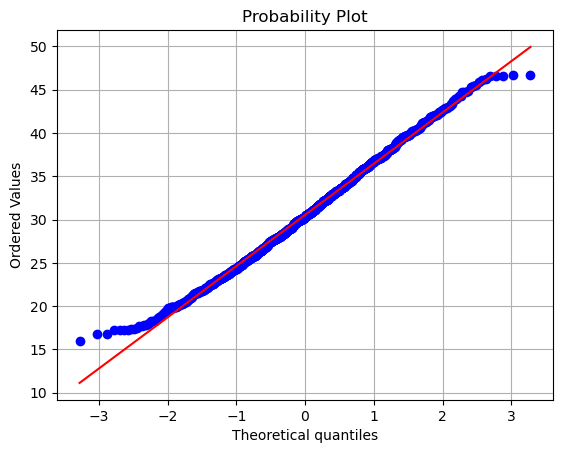

In [60]:
# qqplot for bmi after removing outliers
stats.probplot(clen_df["bmi"],dist="norm",plot=plt)
plt.grid()

# Insights
1. After removing outliers the data distribution is normal distribution
2. The data points are presented in line

# analysing of  children

In [61]:
# non visual univariate analysis
print(df["children"].min())
print(df["children"].max())
print(df["children"].mean())
print(df["children"].median())
print(df["children"].std())
print(" the mean and median both are very near may be there is no outliers")

0
5
1.0949177877429
1.0
1.2054927397819095
 the mean and median both are very near may be there is no outliers


<AxesSubplot:>

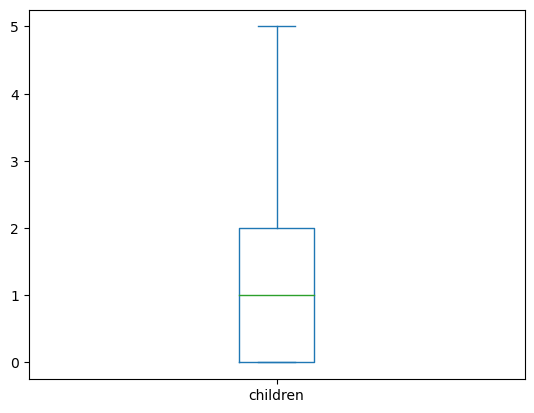

In [62]:
# visual univariate analysis
df["children"].plot(kind="box")

# Insights
1. There are no outliers in the children column
2. The average children is  1 

<AxesSubplot:ylabel='Density'>

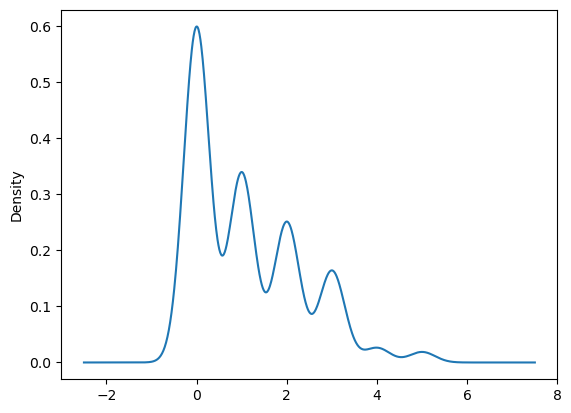

In [63]:
df["children"].plot(kind="kde")

In [11]:
df["children"].skew()

0.9383804401702414

#  Insights
1. In children column the distribution is not a normal distribution
2. It's also not looks like a uniform distribution 
3. The values are started from negative at -2 
4. The skewness of children 0.9383804401702414
 

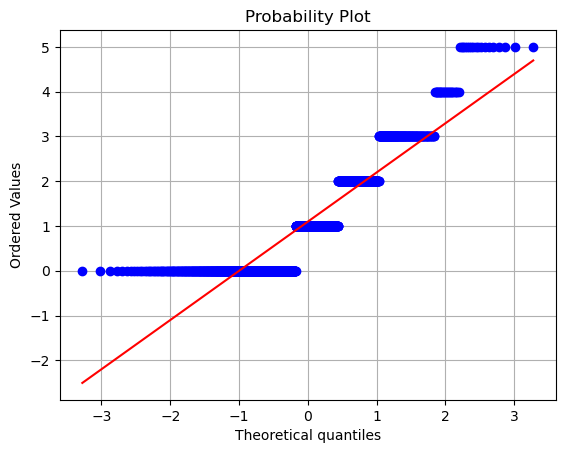

In [64]:
# qqplot for bmi after removing outliers
stats.probplot(clen_df["children"],dist="norm",plot=plt)
plt.grid()

# Insights
1. The distribution is not normal distribution
2. And it is not a uniform  distribution
3. The data looks like discreate numeric column

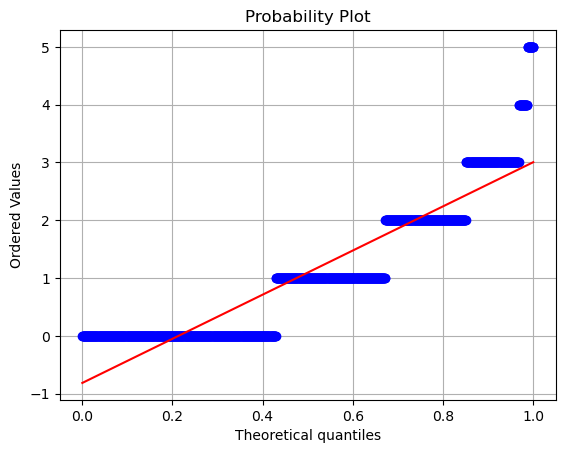

In [65]:
stats.probplot(df["children"],dist="uniform",plot=plt)
plt.grid()

# analysing of smoker

In [52]:
# non visual univariate analysis
df["smoker"].mode()

0    no
Name: smoker, dtype: object

In [53]:
# count of values
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [67]:
# the probability of smoker
df["smoker"].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

<AxesSubplot:>

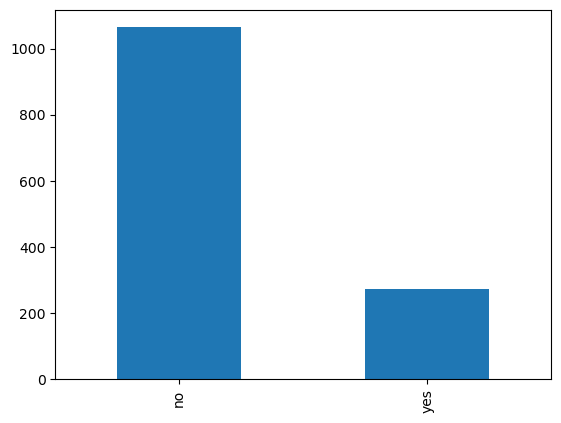

In [68]:
# visual univariate analysis
df["smoker"].value_counts().plot(kind="bar")

# Insights
1. The bar of smoker in there more people are not smokers 1064
2. The smokers are less in data

In [70]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# analysing of region

In [71]:
# non visual univariate analysis
df["region"].mode()

0    southeast
Name: region, dtype: object

In [72]:
# the value count
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [73]:
# the probability of region
df["region"].value_counts(normalize=True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

<AxesSubplot:>

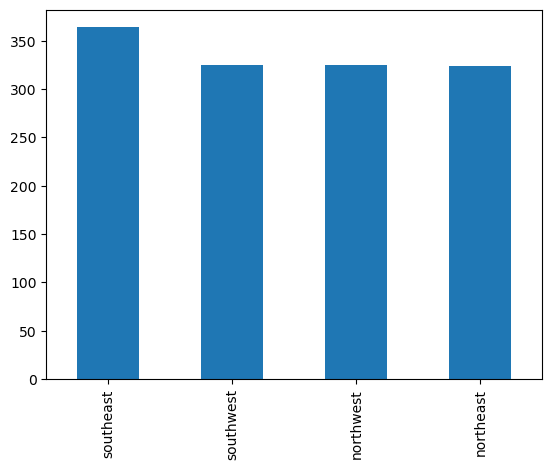

In [74]:
# the bar plot of region
df["region"].value_counts().plot(kind="bar")

# Insights
1. The southeast has more count then others 
2. The southwest and northwest are equal and northeast less than other data
 

# analysing of charges

In [76]:
# non visual univariate analysis
print(df["charges"].min())
print(df["charges"].max())
print(df["charges"].mean())
print(df["charges"].median())
print(df["charges"].std())
print(" the mean and median both are so much difference  may be there are more outliers")

1121.8739
63770.42801
13270.422265141257
9382.033
12110.011236693994
 the mean and median both are so much difference  may be there are more outliers


<AxesSubplot:>

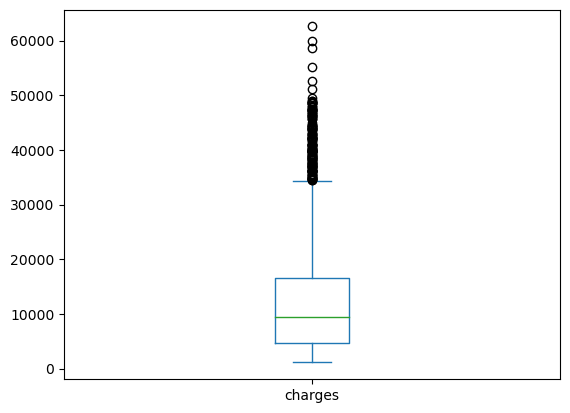

In [13]:
# visual univariate analysis
df["charges"].plot(kind="box")

# Insights
1. There are more outliers in the data at 3500
2. average charges are 93820.03

Text(0.5, 1.0, 'The charges kde plot')

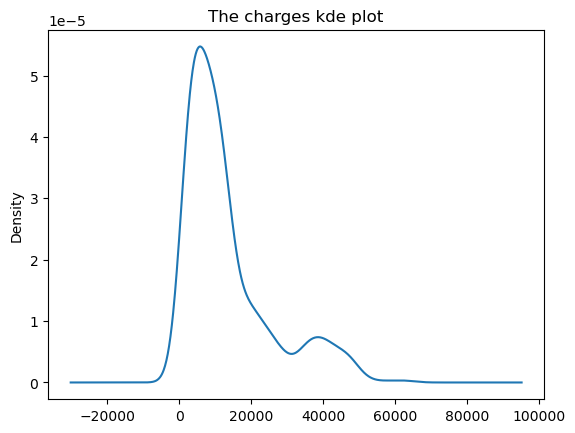

In [4]:
# visual univariate analysis
df["charges"].plot(kind="kde")
plt.title("The charges kde plot")

In [5]:
df["charges"].skew()

1.5158796580240388

# Insights
1. There is skewness in the data 
2. The skewness means  indicates the outliers
3. The skewness is 1.5158796580240388

Text(0.5, 1.0, 'charges')

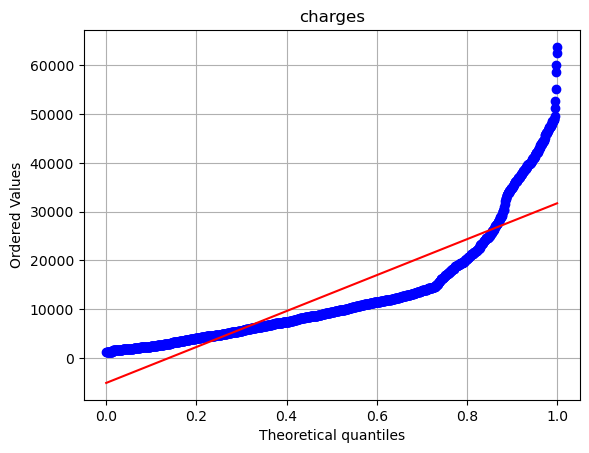

In [47]:
# qq plot check uiform
stats.probplot(df["charges"],dist="uniform",plot=plt)
plt.grid()
plt.title("charges")

# Insights

1. The outliers impact on distribution
2. We can't remove the dependent column


In [95]:
print(df.shape)
#print(char.shape)

(1329, 7)


In [14]:
df["charges"]=x_t

In [13]:
# log transformation of charges on target variable don't use logtransorm
x_t,l=stats.boxcox(df['charges'])
print(l)
# the more outliers are removing is not possible so apply the box cox transformation on ml



0.043516942579678274


In [9]:
# log=
x_t,l=stats.boxcox(df['charges'])


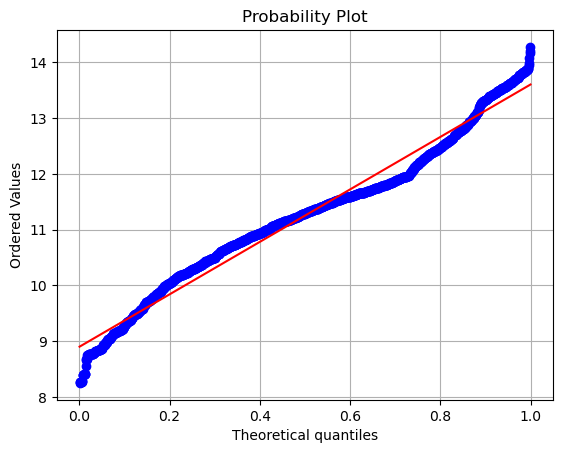

In [12]:
stats.probplot(x_t,dist="uniform",plot=plt)
plt.grid()

# Insights
1. After apply box cox transformation, the dots so near to line  may be uniform dist

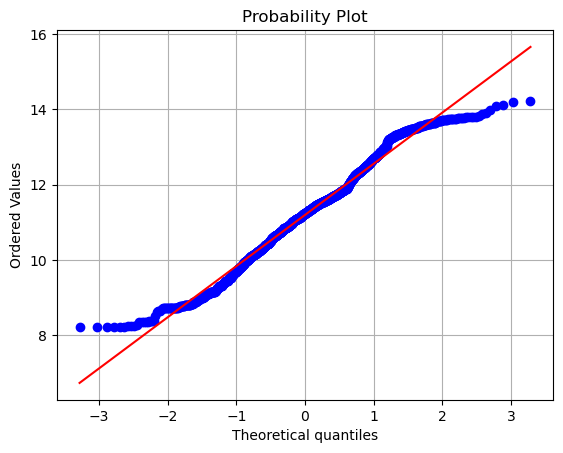

In [83]:
# checking box cox distribution on normal distribution
stats.probplot(x_t,dist="norm",plot=plt)
plt.grid()

# insights
1. After apply box cox transformation, the dots so touches to line  may be normal distribution
2. compare to uniform distribution the data distribution is normal because most data points touched the line

# bivariate non visual analysis 

In [3]:
# it's states the relationship between the features
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Insights
- The age and charges are less positive corelation with 0.299
- The bmi and charges are also have less positive corelation with 0.198

# bivariate analysis
## num/num

## analysing of age and charges

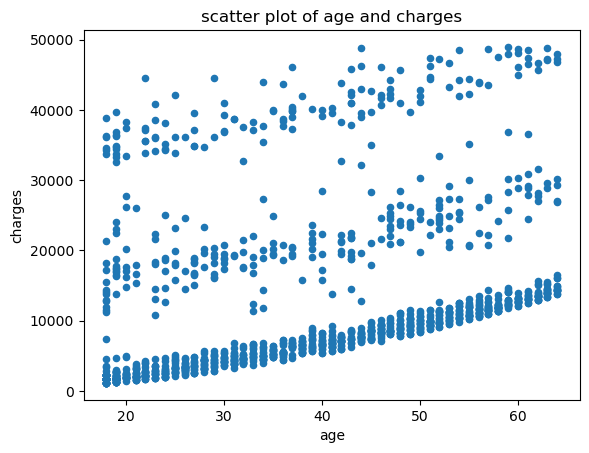

In [21]:
char.plot(x="age",y="charges",kind="scatter")
plt.title("scatter plot of age and charges")
plt.show()

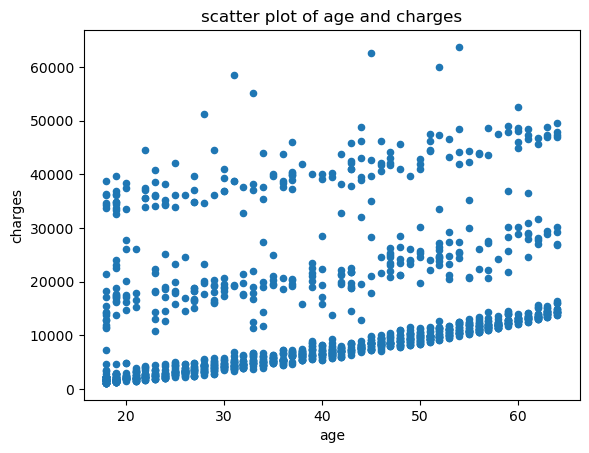

In [88]:
# num / num
# scatter plot
df.plot(x="age",y="charges",kind="scatter")
plt.title("scatter plot of age and charges")
plt.show()

# Insights
1. The scatter plot is of age and charges 
2. There may be  positive relationship between two columns corelation is 0.29
3. At age 20 and charges are less than 10000 and age at 20 and charges are 35000
4. At age 50 and charges are less than 10000 and age at 20 and charges are35000

# analysing of bmi and charges

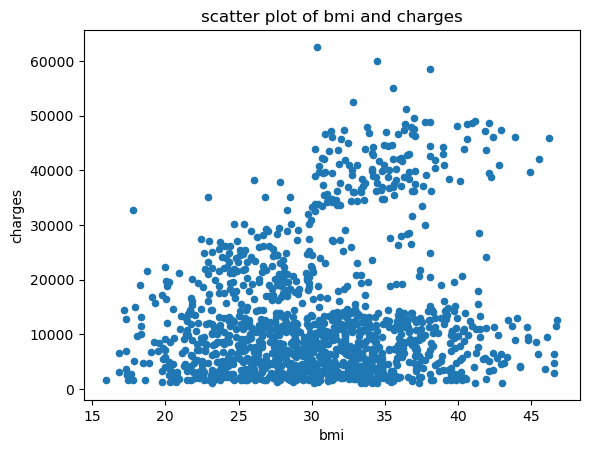

In [113]:
# bmi and charges scatterplot
clen_df.plot(x="bmi",y="charges",kind="scatter")
plt.title("scatter plot of bmi and charges")
plt.show()

# Insights
1. The bmi and charges are positive realationship
2. The bmi is increases than the charges are increasing

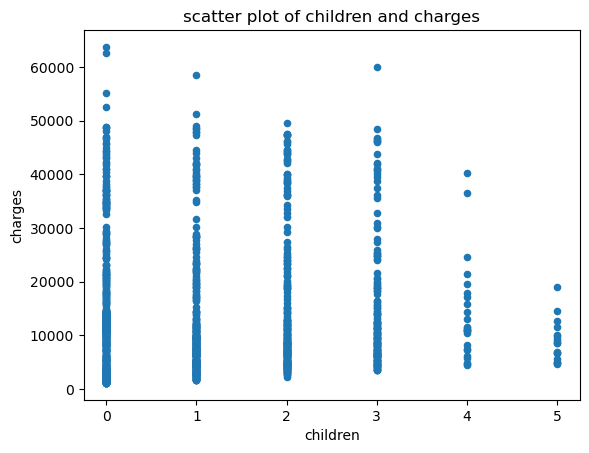

In [114]:
# 
df.plot(x="children",y="charges",kind="scatter")
plt.title("scatter plot of children and charges")
plt.show()

# Insights
1. There is no relationship between these two colunms
2. The children and charges not related each

# box plot
## caterical / num

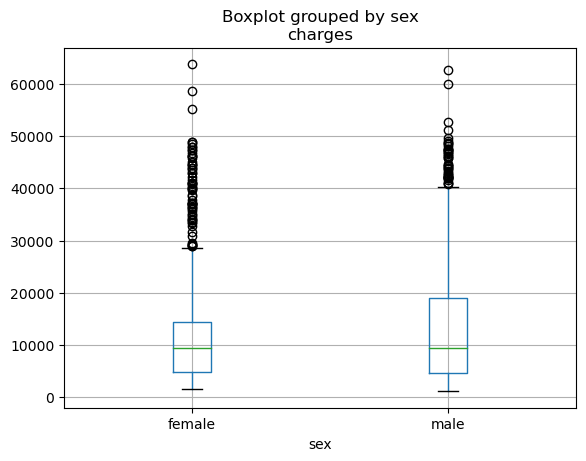

In [116]:
# box plot on categorical / numeric
df.boxplot(by="sex",column="charges")
plt.show()

# Insights
1. In the both male and female have outliters
2. compare to male the  female have more outliers at 28000 and male at 40000 charges
3. The average is similar in male and female

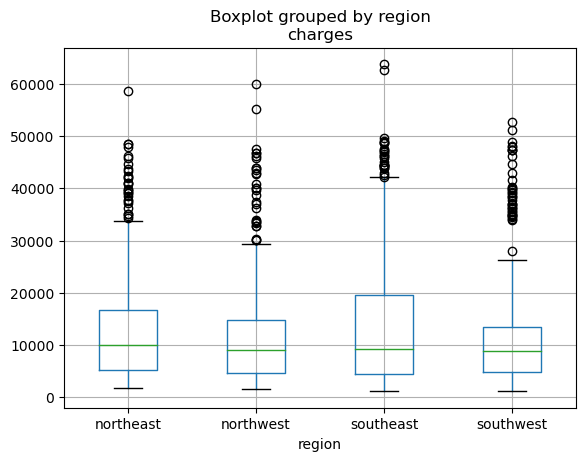

In [117]:
df.boxplot(by="region",column="charges")
plt.show()

# Insights
1. In all regions have outliers in data
2. The average is near 10000 to all regions and northeast is equal to 10000 charges 
3. The outliers are presented above 30000 on charges

KeyError: 'Column not found: log'

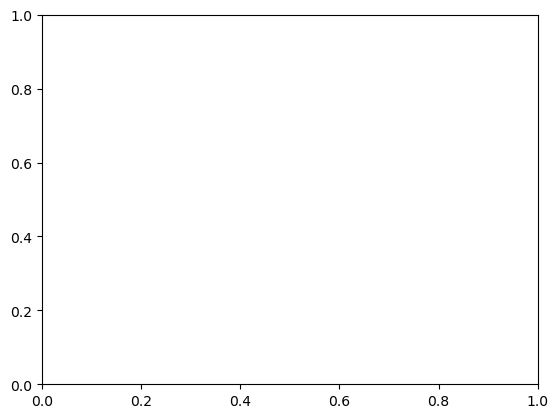

In [11]:
df.boxplot(by="smoker",column="log")
plt.show()

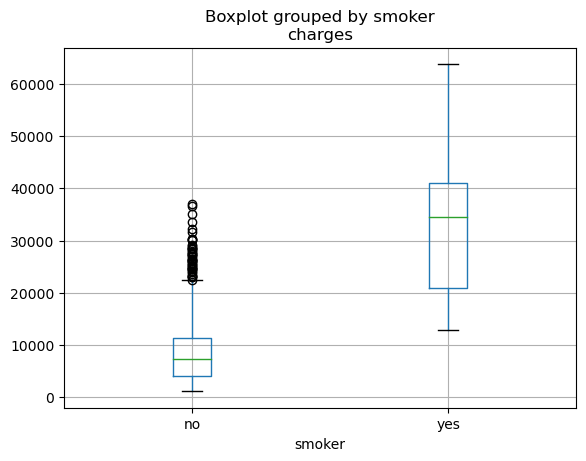

In [8]:
df.boxplot(by="smoker",column="charges")
plt.show()

# Insights
1. In the plot there more smoker in the data in yes column the smoker are impacted charges
2. In the non-smoker are less and under no column high charges indicates outliers

In [ ]:
print()

In [ ]:
# saving the numeric columns in a data frame
clean=df.select_dtypes(include=["int64","float64"])

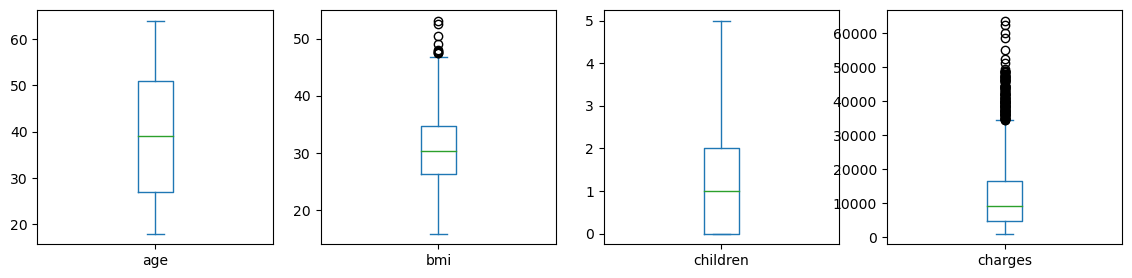

In [110]:
# boxplot for subplots of all numeric columns
clean.plot(kind="box",subplots=True,layout=(4,4,),figsize=(14,14))
plt.title("scatter plot of age and charges")
plt.show()

# Insights
1. There are no outliers in  age and children columns
2. The bmi and charges are outliers are presented in both columns

In [16]:
clean1=clen_df.select_dtypes(include=["int64","float64"])

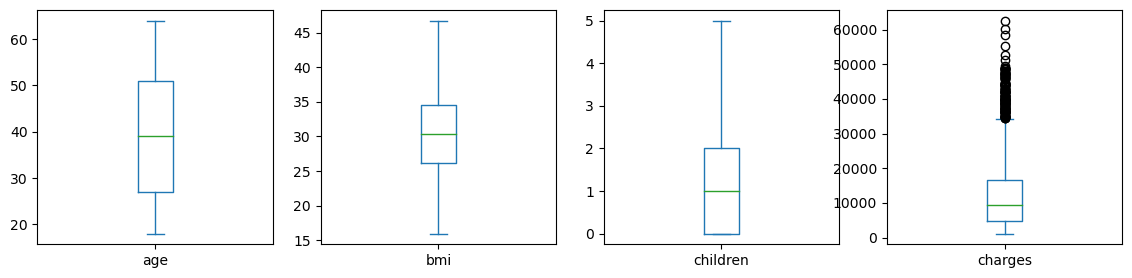

In [21]:
# boxplot for subplots of all numeric columns after removing outliers in bmi column
clean1.plot(kind="box",subplots=True,layout=(4,4,),figsize=(14,14))
plt.title("scatter plot of age and charges")
plt.show()

# conculsion :
-  In the insurance file there various numeric and categorical columns are there
- The bmi and charges columns  are  outliers in the data
- The bmi column the outliers  impacted the distribution after removing outliers the skewness is decreased by removing 9 outliers
- The age and bmi columns are impact the charges  if age increasing the charges are also increased
- And bmi increaesd  then charges are increasing
- The smoking increasing charges


# recommendations :
- The children column is not necessary in data 
- The non-smokers are under less cherges but some outliers are presented in column 
- collect the data of alcohol which impact the charges
- 


##  applying  algoritms to data 

In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## removing of duplicates

In [18]:
df.duplicated(keep="last").sum()

1

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
df1=df.drop_duplicates(keep="first")

In [20]:
df1.duplicated(keep="last").sum()

0

In [21]:
df1.shape

(1328, 7)

In [52]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
# step 1
y=df1["charges"]
X=df1[["age","bmi","children","sex","smoker","region"]]

In [55]:
df["charges"].min()

1121.8739

In [138]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [141]:
X_train.head()

,age,bmi,children,sex,smoker,region
15,19,24.60,1,male,no,southwest
1139,19,32.49,0,female,yes,northwest
1049,49,30.90,0,male,yes,southwest
1015,59,25.46,0,male,no,northwest
1171,43,26.70,2,female,yes,southwest


In [23]:
# step 2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split (X,y, test_size= 0.25,random_state = 0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(996, 6) (996,)
(332, 6) (332,)


## numeric data preprocessing


In [24]:
# numeric processing
X_train_num = X_train.select_dtypes(["int64","float64"])

In [25]:
X_train_num.head()

,age,bmi,children
15,19,24.60,1
1139,19,32.49,0
1049,49,30.90,0
1015,59,25.46,0
1171,43,26.70,2


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescaled =pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns=X_train_num.columns,
                                   index =X_train_num.index)

In [27]:
X_train_num_rescaled.head()

,age,bmi,children
15,-1.432479,-0.977835,-0.090483
1139,-1.432479,0.332621,-0.909767
1049,0.704546,0.068537,-0.909767
1015,1.416887,-0.834997,-0.909767
1171,0.277141,-0.629044,0.728801


## categorical data one hot encoding

In [28]:
X_train_cat = X_train.select_dtypes(["object"])
X_train_cat.head()

,sex,smoker,region
15,male,no,southwest
1139,female,yes,northwest
1049,male,yes,southwest
1015,male,no,northwest
1171,female,yes,southwest


## one hot encoding data is nominal

In [29]:
X_train_cat_one = pd.DataFrame(index=X_train_cat.index)
X_train_cat_one.head()

""
15
1139
1049
1015
1171


In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop="first",sparse_output=False)
X_train_cat_one = pd.DataFrame(encoder.fit_transform(X_train_cat),
                              columns=encoder.get_feature_names_out(X_train_cat.columns),
                              index = X_train_cat.index)
X_train_cat_one.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
15,1.0,0.0,0.0,0.0,1.0
1139,0.0,1.0,1.0,0.0,0.0
1049,1.0,1.0,0.0,0.0,1.0
1015,1.0,0.0,1.0,0.0,0.0
1171,0.0,1.0,0.0,0.0,1.0


## concat num and cat

In [31]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_one],axis=1)
X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
15,-1.432479,-0.977835,-0.090483,1.0,0.0,0.0,0.0,1.0
1139,-1.432479,0.332621,-0.909767,0.0,1.0,1.0,0.0,0.0
1049,0.704546,0.068537,-0.909767,1.0,1.0,0.0,0.0,1.0
1015,1.416887,-0.834997,-0.909767,1.0,0.0,1.0,0.0,0.0
1171,0.277141,-0.629044,0.728801,0.0,1.0,0.0,0.0,1.0


## X_test data preprocessing

In [32]:
X_test_num = X_test.select_dtypes(["int64","float64"])
X_test_num.head()

,age,bmi,children
1295,20,22.00,1
448,40,29.60,0
461,42,30.00,0
252,54,34.21,2
1259,52,23.18,0


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_num_rescaled = pd.DataFrame(scaler.fit_transform(X_test_num),
                                  columns=X_test_num.columns,
                                  index= X_test_num.index)
X_test_num_rescaled.head()

,age,bmi,children
1295,-1.393537,-1.550223,-0.049052
448,0.032208,-0.194005,-0.906172
461,0.174783,-0.122625,-0.906172
252,1.030230,0.628648,0.808068
1259,0.887655,-1.339652,-0.906172


In [34]:
X_test_cat = X_test.select_dtypes(["object"])
X_test_cat.head()

,sex,smoker,region
1295,male,no,southwest
448,female,no,southwest
461,male,yes,southwest
252,male,yes,southeast
1259,female,no,northeast


In [35]:
X_test_cat_one = pd.DataFrame(encoder.fit_transform(X_test_cat),
                             columns=encoder.get_feature_names_out(X_test_cat.columns),
                             index = X_test_cat.index)
X_test_cat_one.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1295,1.0,0.0,0.0,0.0,1.0
448,0.0,0.0,0.0,0.0,1.0
461,1.0,1.0,0.0,0.0,1.0
252,1.0,1.0,0.0,1.0,0.0
1259,0.0,0.0,0.0,0.0,0.0


In [36]:
X_test_transform = pd.concat([X_test_num_rescaled,X_test_cat_one],axis=1)
X_test_transform.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1295,-1.393537,-1.550223,-0.049052,1.0,0.0,0.0,0.0,1.0
448,0.032208,-0.194005,-0.906172,0.0,0.0,0.0,0.0,1.0
461,0.174783,-0.122625,-0.906172,1.0,1.0,0.0,0.0,1.0
252,1.030230,0.628648,0.808068,1.0,1.0,0.0,1.0,0.0
1259,0.887655,-1.339652,-0.906172,0.0,0.0,0.0,0.0,0.0


## linear regresion model

In [40]:
# step 4
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed,y_train)

LinearRegression()

In [41]:
# step 6
y_test_pred = regressor.predict(X_test_transform)


In [42]:
# step 7 
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)


4405.633133727656

In [43]:
# transformed values

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

log_score1=metrics.r2_score(y_test, y_test_pred)
log_precent =log_score1 * 100
print("%.0f"%log_precent)
print(log_score1)

Mean Absolute Error:  4405.633133727656
Mean Squared Error:  40640649.30418605
Root Mean Squared Error:  6375.001906210386
74
0.7350027823382087


In [44]:
temp_df = pd.DataFrame({"actual": y_test,"predicted":y_test_pred})
temp_df.head()

,actual,predicted
1295,1964.7800,-183.259621
448,5910.9440,7007.237216
461,22144.0320,31541.889440
252,44260.7499,37287.757835
1259,10197.7722,9024.334054


In [45]:
sns.histplot(y_test,color="red",alpha =0.5)
sns.histplot(y_test_pred,color="blue",alpha =0.5)

NameError: name 'sns' is not defined

In [ ]:
import seaborn as sns

## KNN model

In [46]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred_k = regressor.predict(X_test_transform)

metrics.mean_absolute_error(y_test,y_test_pred_k)


3919.158648293976

In [47]:
temp_df = pd.DataFrame({"actual": y_test,"predicted":y_test_pred_k})
temp_df.head()

,actual,predicted
1295,1964.7800,1890.898200
448,5910.9440,4753.804800
461,22144.0320,24771.376822
252,44260.7499,37101.052240
1259,10197.7722,12374.476610


In [48]:
sns.histplot(y_test,color="red",alpha =0.5)
sns.histplot(y_test_pred_k,color="blue",alpha =0.5)

NameError: name 'sns' is not defined

In [49]:
import seaborn as sns

In [50]:
# log transformed values


print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_k))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_k))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_k)))

Knn_score1=metrics.r2_score(y_test, y_test_pred_k)
knn_precent =Knn_score1 * 100
print("%.0f"%knn_precent)
print(Knn_score1)

Mean Absolute Error:  3919.158648293976
Mean Squared Error:  46222544.00176439
Root Mean Squared Error:  6798.7163495592595
70
0.6986060566592465


## decision tree model

In [51]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred_d = regressor.predict(X_test_transform)

metrics.mean_absolute_error(y_test,y_test_pred_d)


3167.349470783133

In [52]:
temp_df = pd.DataFrame({"actual": y_test,"predicted":y_test_pred_d})
temp_df.head()

,actual,predicted
1295,1964.7800,2103.08000
448,5910.9440,5415.66120
461,22144.0320,32787.45859
252,44260.7499,43254.41795
1259,10197.7722,9991.03765


<AxesSubplot:xlabel='charges', ylabel='Count'>

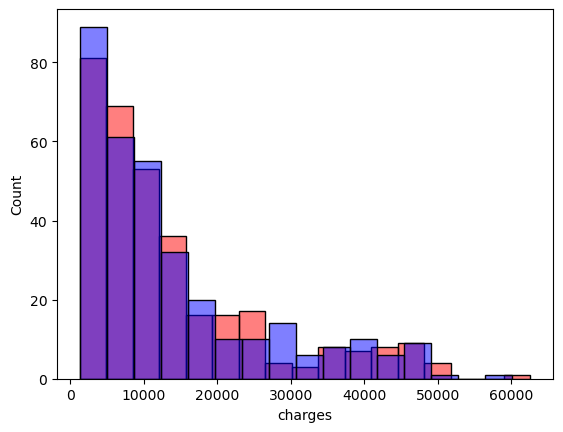

In [53]:
sns.histplot(y_test,color="red",alpha =0.5)
sns.histplot(y_test_pred_d,color="blue",alpha =0.5)

In [54]:
# log transformed values

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_d))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_d))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_d)))

Mean Absolute Error:  3167.349470783133
Mean Squared Error:  45199331.29606848
Root Mean Squared Error:  6723.044793549161


In [55]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_d))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_d))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_d)))

print('R2 Score: ', metrics.r2_score(y_test, y_test_pred_d))


dt_score1=metrics.r2_score(y_test, y_test_pred_d)
dt_precent =dt_score1 * 100
print("%.0f"%dt_precent)
print(dt_score1)

Mean Absolute Error:  3167.349470783133
Mean Squared Error:  45199331.29606848
Root Mean Squared Error:  6723.044793549161
R2 Score:  0.7052779116794782
71
0.7052779116794782


# support vector model 


In [56]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed,y_train)

y_test_pred_svr = regressor.predict(X_test_transform)

metrics.mean_absolute_error(y_test,y_test_pred_svr)


8666.76114707824

In [57]:
temp_df = pd.DataFrame({"actual": y_test,"predicted":y_test_pred_svr})
temp_df.head()

,actual,predicted
1295,1964.7800,9185.357823
448,5910.9440,9218.903826
461,22144.0320,9262.787923
252,44260.7499,9305.929204
1259,10197.7722,9274.968951


<AxesSubplot:xlabel='charges', ylabel='Count'>

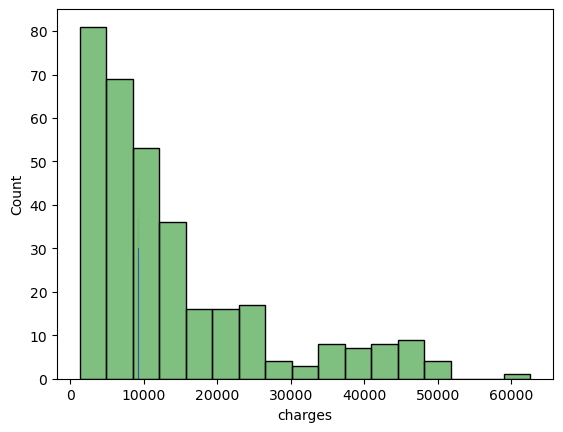

In [58]:
sns.histplot(y_test,color="green",alpha =0.5)
sns.histplot(y_test_pred_svr,color="blue",alpha =0.5)

In [59]:

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_svr))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_svr))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_svr)))

print('R2 score: ', metrics.r2_score(y_test, y_test_pred_svr))



svm_score1=metrics.r2_score(y_test, y_test_pred_svr)
svm_precent =svm_score1 * 100
print("%.0f"%svm_precent)
print(svm_score1)

Mean Absolute Error:  8666.76114707824
Mean Squared Error:  173168040.00111714
Root Mean Squared Error:  13159.33280987745
R2 score:  -0.1291416247996604
-13
-0.1291416247996604


## rondom forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred_r = regressor.predict(X_test_transform)

metrics.mean_absolute_error(y_test,y_test_pred_r)


2800.5761967502112

In [61]:
temp_df = pd.DataFrame({"actual": y_test,"predicted":y_test_pred_r})
temp_df.head()

,actual,predicted
1295,1964.7800,2166.900142
448,5910.9440,6430.296343
461,22144.0320,33392.462574
252,44260.7499,44014.021363
1259,10197.7722,13101.398810


<AxesSubplot:xlabel='charges', ylabel='Count'>

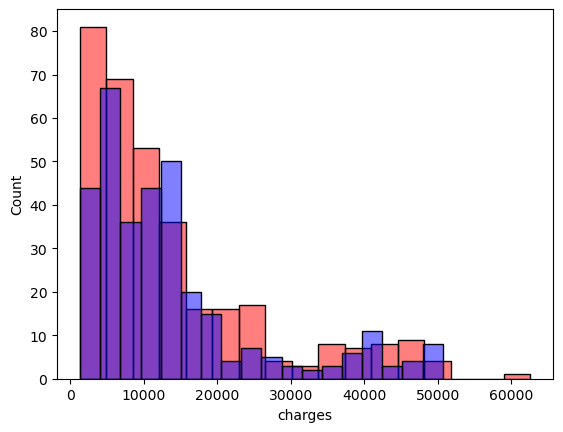

In [62]:
sns.histplot(y_test,color="red",alpha =0.5)
sns.histplot(y_test_pred_r,color="blue",alpha =0.5)

In [63]:
# log transformed values


print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_r))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_r))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_r)))

print('R2 score: ', metrics.r2_score(y_test, y_test_pred_r))



rf_score1=metrics.r2_score(y_test, y_test_pred_r)
rf_precent =rf_score1 * 100
print("%.0f"%rf_precent)
print(rf_score1)

Mean Absolute Error:  2800.5761967502112
Mean Squared Error:  24972552.53981867
Root Mean Squared Error:  4997.254500204955
R2 score:  0.8371665548098608
84
0.8371665548098608


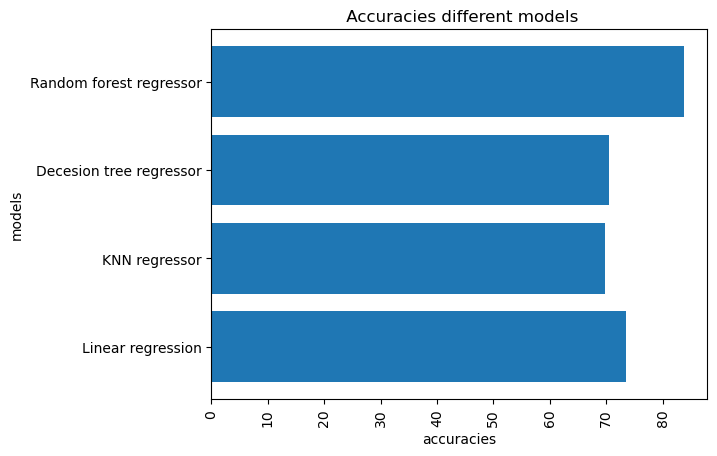

In [65]:
 
# list of models names
models =["Linear regression","KNN regressor","Decesion tree regressor","Random forest regressor"]

# list of accuraies 
accuracies =[log_precent,knn_precent,dt_precent,rf_precent]

plt.barh(models,accuracies)

plt.ylabel("models")
plt.xlabel("accuracies")
plt.title(" Accuracies different models")
plt.xticks(rotation=90)

plt.show()

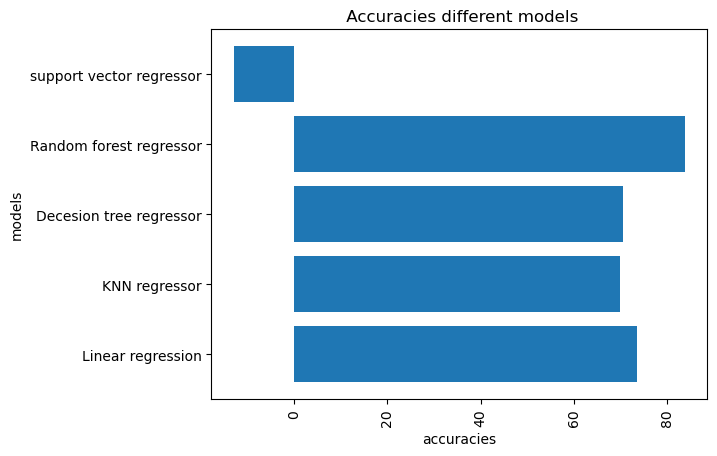

In [66]:
import matplotlib.pyplot as plt
 
# list of models names
models =["Linear regression","KNN regressor","Decesion tree regressor","Random forest regressor","support vector regressor"]

# list of accuraies 
accuracies =[log_precent,knn_precent,dt_precent,rf_precent,svm_precent]

plt.barh(models,accuracies)

plt.ylabel("models")
plt.xlabel("accuracies")
plt.title(" Accuracies different models")
plt.xticks(rotation=90)

plt.show()

# conclusion :
1. The above all models are perform good expect support vector regressor
2. The Random forest regressor gives best predictions to compare with other models
